## Fashion Mnist Clothing Classification using Neural Network

In [24]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import numpy as np


In [25]:
# Loading dataset
dataset = tf.keras.datasets.fashion_mnist
(train_image,train_labels),(test_image,test_labels) = dataset.load_data()


In [26]:
# Data Preprocessing
train_image,test_image = train_image/255.0, test_image/255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


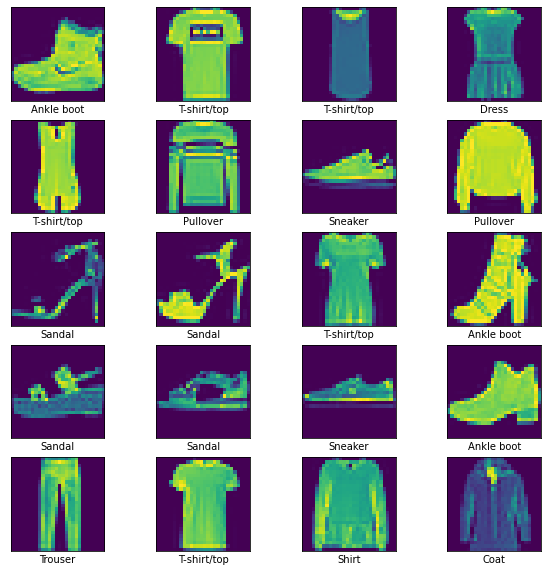

In [27]:
# Showing Some Examples
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_image[i])
  plt.xlabel(class_names[train_labels[i]])

In [28]:
# Model Building
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(units = 512,activation='relu',kernel_initializer='he_uniform'),
     tf.keras.layers.Dense(units = 256,activation='relu',kernel_initializer='he_uniform'),
     tf.keras.layers.Dense(units= 128,activation='relu',kernel_initializer='he_uniform'),
     tf.keras.layers.Dense(units= 64,activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.2),
     


     tf.keras.layers.Dense(units=10,activation='softmax')
    ]
)


In [29]:
#Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [30]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [31]:
#Fit model on dataset
history = model.fit(train_image,train_labels,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6846 - accuracy: 0.7573
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3928 - accuracy: 0.8571
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3560 - accuracy: 0.8720
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3183 - accuracy: 0.8831
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3023 - accuracy: 0.8905
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8918
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2742 - accuracy: 0.8984
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2640 - accuracy: 0.9022
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2508 - accuracy: 0.9069
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [32]:
# Model Evaluation
model.evaluate(test_image,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.9773 - accuracy: 0.8915


[0.9773207902908325, 0.8914999961853027]

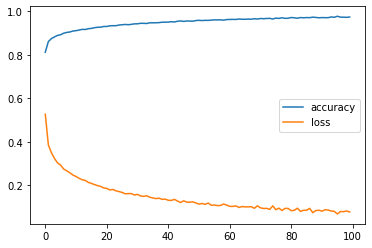

In [33]:
# Result
metrics = history.history
plt.plot(metrics['accuracy'])
plt.plot(metrics['loss'])
plt.legend(['accuracy','loss'])

In [34]:
# Prediction Single Image Class
def predict_single_image(filename):
  '''Function to predict single image class'''
  img = Image.open(filename)
  img = img.resize((28,28))
  img = img.convert('L')
  img = np.array(img)
  img = img/255.0
  img = np.expand_dims(img,axis = 0)
  prob = model.predict(img)
  print(prob)
  prob = class_names[np.argmax(prob)]
  return prob


In [35]:
def result(filename,category):
  plt.figure
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.xlabel(category)




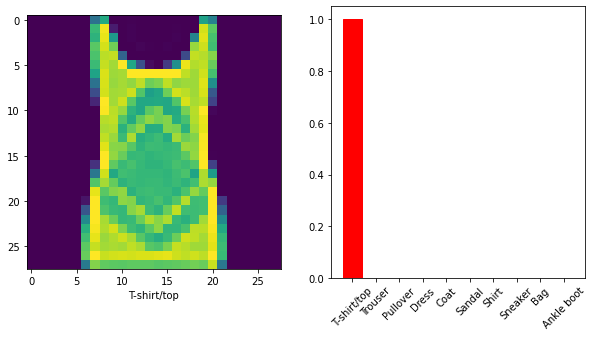

In [36]:
## Example
ex1 = train_image[64]
y = class_names[np.argmax(train_labels[64])]
ex1 = np.expand_dims(ex1,0)
p = model.predict(ex1)
category = class_names[np.argmax(p)]

#plotting
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(ex1))
plt.xlabel(category)
plt.subplot(1,2,2)
plt.xticks(range(10),class_names,rotation = 45)
thisplot = plt.bar(class_names,np.squeeze(p))
thisplot[np.argmax(train_labels[64])].set_color("red")
# thisplot[np.argmax(p)].set_color("blue")


In [37]:
print(category)


T-shirt/top
